In [8]:
import pandas as pd
import re 

# Gensim for topic modeling
import gensim
from gensim.utils import simple_preprocess
from gensim import matutils, models
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import scipy.sparse

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
# !pip install pyLDAvis

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
ori_df = pd.read_csv('HWZ_singapore_subreddit_nochinese_nosinglish.csv')

ori_df = ori_df.dropna()

print(ori_df.shape)
ori_df.head()

df = ori_df.sample(n=5000, random_state=999)
print(df.shape)

(54751, 7)
(5000, 7)


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Convert to list
data = df.text.values.tolist()


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# # Let's start with 2 topics.
# lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
# lda_model.print_topics()

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Convert to list
data = df.text.values.tolist()
data[:5]
# Remove @mentions 


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nobody ya want act ban',
 'drink also',
 'ye kung u betray late father member careful come drag whole family downstairs ?',
 'add list person need politician heart attack naive medical access never equal fair since forever received unnecessary experimental expensive antibody treatment despite asymptotic covid infection clear ward security reason politician current regardless medical condition period ? !',
 'area hear one know carefully times know ?']

# remove stopwords 

In [26]:
# Remove urls (remove a word starting with http)
# data = [re.sub(r'@\w+', '', sent) for sent in data]
# data = [re.sub(r'http\S+', '', sent) for sent in data]

nltk.download('punkt')
nltk.download('stopwords')

# set stop words
stop_words = stopwords.words('english')

stop_words.extend([ 'bit', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])


newdata = []
for sent in data:
    # tokenize
    tokenized_review = word_tokenize(sent)
    # standardize to lower case
    lower_review = [w.lower() for w in tokenized_review]
    # keep token words which are text
    text_words_only = [w for w in lower_review if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stop_words]
    text_joined = " ".join(text_stopremoved)
    newdata.append(text_joined)

newdata[:5]

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


nobody ya want act ban
drink also
ye kung u betray late father member careful come drag whole family downstairs ?
add list person need politician heart attack naive medical access never equal fair since forever received unnecessary experimental expensive antibody treatment despite asymptotic covid infection clear ward security reason politician current regardless medical condition period ? !
area hear one know carefully times know ?
use get good fake everything must honest lie interview later company check talk bad ex manager company leave company must leave good impression burn small company b get caught fake go ah honest n know serving short jail sentence go back country good life earning much money c become management hire people company form gang anything want company relationship bu become management dare hire people scare kana complain boss lose job worth n even dare bu say n eat work job enjoy life work everyday grab earn month say good n need work nasty boss enough good life e 

today national day eating dinner celebrate ?
ah need ask prefer working peak audit reservist working peak even field total misery terrible soldiering
land mine channel go die accent always never forget without would still nation
application also get wait would saved big chunk recall people know got go chance select
ge voice low coarse
like grab delivery man said earn got work days week day plus performance bonus
real man lick wipe hand sent thats captain ? !
pay finish talk boss also got wind u milk powder milk powder
capybara eat huge pumpkin
much thing often good sight smell
must pantry
spit revenge sweet democratic party unexpectedly trump
ah many countless ghost ghost china infamous structurally building china surrounding ghost city work completely stopped many staff entire deserted work site go amount ghost china simply thanks corrupted boss pooh xi click expand wah city remember sheep bragging project china even hour drive site video slightly always smoking great china relationsh

say siol dey chao kan burn year sho march true sense pride come even though ? ? ? ? ? ! ! ! !
house open new salon female hairdresser cos ? ? ?
take hospitalization leave better burn
tipsy tipsy collective different ?
u think concrete structure industrial park photo tan photo tan photo tan ?
gorilla white ?
tell click expand n know gone starrystarrynight said ? ? ? ? ? ? ? ? ?
exit interview box ticking exercise wayang n serious person want complete process
yeah nowadays considered dive deep front end like react grab popcorn
meaning real puppet master holding limelight also lots money pharmaceutical right track record high selling low could breakdown finally seeing something turn gold cost guess r ? ?
settle control willy either might want gorge need gorge wear lazy eye patch cos least reversible ?
often sound v loud like kitchen hall u hear yes clear ice bother ah scare later repair quote hundred buy new one less headache ?
tai thong one better ? ?
service provider cold call call back

call milo auntie genuine search president milo ?
click expand wa eh blinking top
patient ?
opposition win selfish gains instead morals logic use self interest decide vote end keep voting pap never ending debate
ask work dome
sue win time wasted settle said
also came boost sector pap lie shameless whats another word boost ?
offer tea
evil time stage humankind new evil
ah start company find ah come agent ?
?
safe take train ?
order phone trace call check house phone finger ? ?
went nak watching movie
duck good buy pang
single smart resourceful extremely think fine talking n time scraped time eh scrapped took level ?
went clinic finish art test result given told go home protocol change nowadays must negative art test finish result never tell take ?
note question mark tone like driver video would like ask u come u thought driver ah posted thread video u automatically assumed driver video ? ?
say later hell fully open ur taxi got religious inside protection oh really special today ? ? ?
wou

opening variant matter time
n hire maid send mother old home afford incident want spend quality time still b going take care mother find flexible spend time hope
massage shop cheng one den u go like u u end mean wad customer already ? ?
fortune floor must prepared drink wo n serve
click expand healthy need mask also
life take
door tan
give man award give award ! !
used change sign new plan n economics sign plan long run sign plan buy phone outright yet seem upgrade phone least buy new phone every year excellent note z fold coolness z flip gotten ordered one gray version need new card card mi yeah know got many flip use together note backup fold retaining status main phone
click expand another classic r rated movie girl quite pretty
rook good
never told confidential exactly also even tell go
jelly bo click expand prefer service buy good food ?
taken kitchen window see lot owner got internal path also click expand actually siding either picture already us whether right wrong
come victim 

also intensity job easily work days security guard auditor reject reality substitute
since title imply lose half trillion study good people like like like stirring sai motive ? ?
home big enough would amazing hoot bigger motivation dah life v short ai song song ah ! !
classic opening theme
seriously n understand vaccination cure never punish even fully also next public transport must see status must walk cycle ah going make vaccination mandatory soon even draconic ? ?
jail white trash deport back need serve jail sentence mock judiciary let like ? ? ? ? ! !
also forgotten care
instead like daily basis take responsibility take care health instead blaming government health many young healthy people see dying even virus despite delta variant still seeing old people dying please take responsibility health lose weight exercise blaming government opening pathetic click expand one day karma find u ? ? !
one thing sure correct
thats long ago know life old onwards went haywire spent nothing go t

['nobody ya act ban',
 'drink',
 'ye kung u betray late father member careful drag whole family downstairs',
 'add list person politician heart attack naive medical access never equal fair since forever received unnecessary experimental expensive antibody treatment despite asymptotic covid infection clear ward security reason politician current regardless medical condition period',
 'area hear one carefully times']

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(newdata))

print(data_words[:1])

[['nobody', 'ya', 'act', 'ban']]


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Build the bigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def lemmatization(texts, allowed_postags=['NOUN']):
    """"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component
# For normal use
# !python -m spacy download en_core_web_sm
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# For Colab use
import en_core_web_sm
nlp = en_core_web_sm.load()

print("Before Lemmatization:", data_words_bigrams[:1])

# Do lemmatization keeping only noun
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'PROPN',"ADJ"])

print("After Lemmatization: ", data_lemmatized[:1])


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Before Lemmatization: [['nobody', 'ya', 'act', 'ban']]
After Lemmatization:  [['ban']]


# remove stop words again because after lematizing there may be shortened junk words that dont make sense

In [30]:
# Remove urls (remove a word starting with http)
data = [re.sub(r'@\w+', '', sent) for sent in data]
data = [re.sub(r'http\S+', '', sent) for sent in data]

nltk.download('punkt')
nltk.download('stopwords')

# set stop words
stop_words = stopwords.words('english')
stop_words.extend(["thank","thanks","great","way","dh","wonderful"])
stop_words.extend(['thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])


newdata = []
for data_sent in data_lemmatized:

    text_stopremoved = [w for w in data_sent if w not in stop_words]
    newdata.append(text_stopremoved)
# newdata[:5]

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(newdata)
id2word.filter_extremes(no_below=1.5, no_above=0.8) # this will filter out words that are less frequen

# Create Corpus
texts = newdata

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
print(id2word[0], id2word[1], id2word[2], id2word[3], id2word[4])


ban careful drag father kung


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# adjust the number of models here

In [33]:
# Build LDA model

lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda_model.print_topics()

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.057*"china" + 0.017*"song" + 0.016*"dun" + 0.013*"time" + 0.011*"love" + 0.011*"quality" + 0.009*"life" + 0.009*"military" + 0.009*"high" + 0.009*"bad"'),
 (1,
  '0.045*"job" + 0.021*"time" + 0.018*"year" + 0.013*"normal" + 0.012*"happy" + 0.012*"area" + 0.009*"money" + 0.009*"loan" + 0.008*"interest" + 0.008*"sleep"'),
 (2,
  '0.016*"much" + 0.012*"people" + 0.011*"thing" + 0.011*"language" + 0.011*"small" + 0.010*"low" + 0.009*"north" + 0.009*"test" + 0.008*"company" + 0.008*"power"'),
 (3,
  '0.021*"man" + 0.012*"people" + 0.012*"money" + 0.011*"part" + 0.011*"boss" + 0.010*"anti" + 0.010*"sure" + 0.009*"work" + 0.009*"country" + 0.009*"project"'),
 (4,
  '0.037*"big" + 0.015*"rich" + 0.015*"high" + 0.014*"money" + 0.011*"people" + 0.010*"old" + 0.009*"well" + 0.009*"family" + 0.009*"poor" + 0.008*"much"'),
 (5,
  '0.021*"click_expand" + 0.014*"car" + 0.012*"people" + 0.012*"pay" + 0.011*"next" + 0.010*"body" + 0.010*"side_effect" + 0.009*"price" + 0.009*"guy" + 0.009*"typ

# coherence score of 0.5 is the best the lower the perplexity score the better

In [34]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=newdata, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.939690091263898

Coherence Score:  0.38897566409584006


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.044419 -0.084114       1        1  14.917843
4      0.049675 -0.031769       2        1  12.616459
6      0.044381 -0.129373       3        1  11.087228
2     -0.110247 -0.040826       4        1  10.052774
3      0.121096 -0.065588       5        1   8.952583
0      0.212366  0.057264       6        1   8.891953
5     -0.004645 -0.017293       7        1   8.879875
8     -0.130986 -0.098505       8        1   8.548238
9      0.052659  0.246435       9        1   8.151807
1     -0.189878  0.163769      10        1   7.901238, topic_info=         Term        Freq       Total Category  logprob  loglift
143     china  198.000000  198.000000  Default  30.0000  30.0000
64        job  140.000000  140.000000  Default  29.0000  29.0000
98        big  190.000000  190.000000  Default  28.0000  28.0000
100       day  220.000000  220.000000  Default  27.0000  27.0000
78     people  365.000000  365.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
146       new   19.980473  153.539960  Topic10  -4.8811   0.4989
98        big   17.710947  190.118287  Topic10  -5.0017   0.1647
88       work   16.710666  161.686655  Topic10  -5.0598   0.2685
551      next   15.373301   81.084232  Topic10  -5.1432   0.8753
541  business   14.447435   44.532044  Topic10  -5.2053   1.4125

[627 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1483      8  0.869352  acceptable
626       5  0.417030         act
626       8  0.208515         act
626       9  0.208515         act
626      10  0.156386         act
...     ...       ...         ...
266       5  0.016560       young
266       6  0.165596       young
266       7  0.049679       young
266       8  0.049679       young
266       9  0.033119       young

[1158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 7, 3, 4, 1, 6, 9, 10, 2])

In [36]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'topic_perc_contrib', 'keywords']
    
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)
df_topic_sents_keywords.head()


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dominant_topic,topic_perc_contrib,keywords
0,7.0,0.5499,"day, covid, world, vaccine, work, time, people..."
1,0.0,0.1000,"china, song, dun, time, love, quality, life, m..."
2,0.0,0.6375,"china, song, dun, time, love, quality, life, m..."
3,4.0,0.5826,"big, rich, high, money, people, old, well, fam..."
4,1.0,0.7000,"job, time, year, normal, happy, area, money, l..."


# wordcloud

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


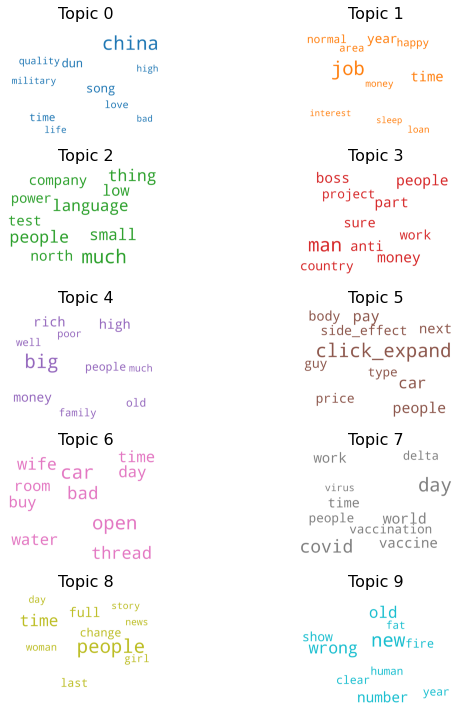

In [37]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

# adjust number of plots here
fig, axes = plt.subplots(5,2, figsize=(10,10), sharex=True, sharey=True)


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)

    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [38]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['topic_perc_contrib'], ascending=[0]).head(3)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# # Show
sent_topics_sorteddf_lda

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dominant_topic,topic_perc_contrib,keywords
0,0.0,0.9743,"china, song, dun, time, love, quality, life, m..."
1,0.0,0.9654,"china, song, dun, time, love, quality, life, m..."
2,0.0,0.9591,"china, song, dun, time, love, quality, life, m..."
3,1.0,0.9526,"job, time, year, normal, happy, area, money, l..."
4,1.0,0.9437,"job, time, year, normal, happy, area, money, l..."
5,1.0,0.9437,"job, time, year, normal, happy, area, money, l..."
6,2.0,0.9500,"much, people, thing, language, small, low, nor..."
7,2.0,0.9382,"much, people, thing, language, small, low, nor..."
8,2.0,0.9250,"much, people, thing, language, small, low, nor..."
9,3.0,0.9571,"man, people, money, part, boss, anti, sure, wo..."


C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-bdac23c98665>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-bda

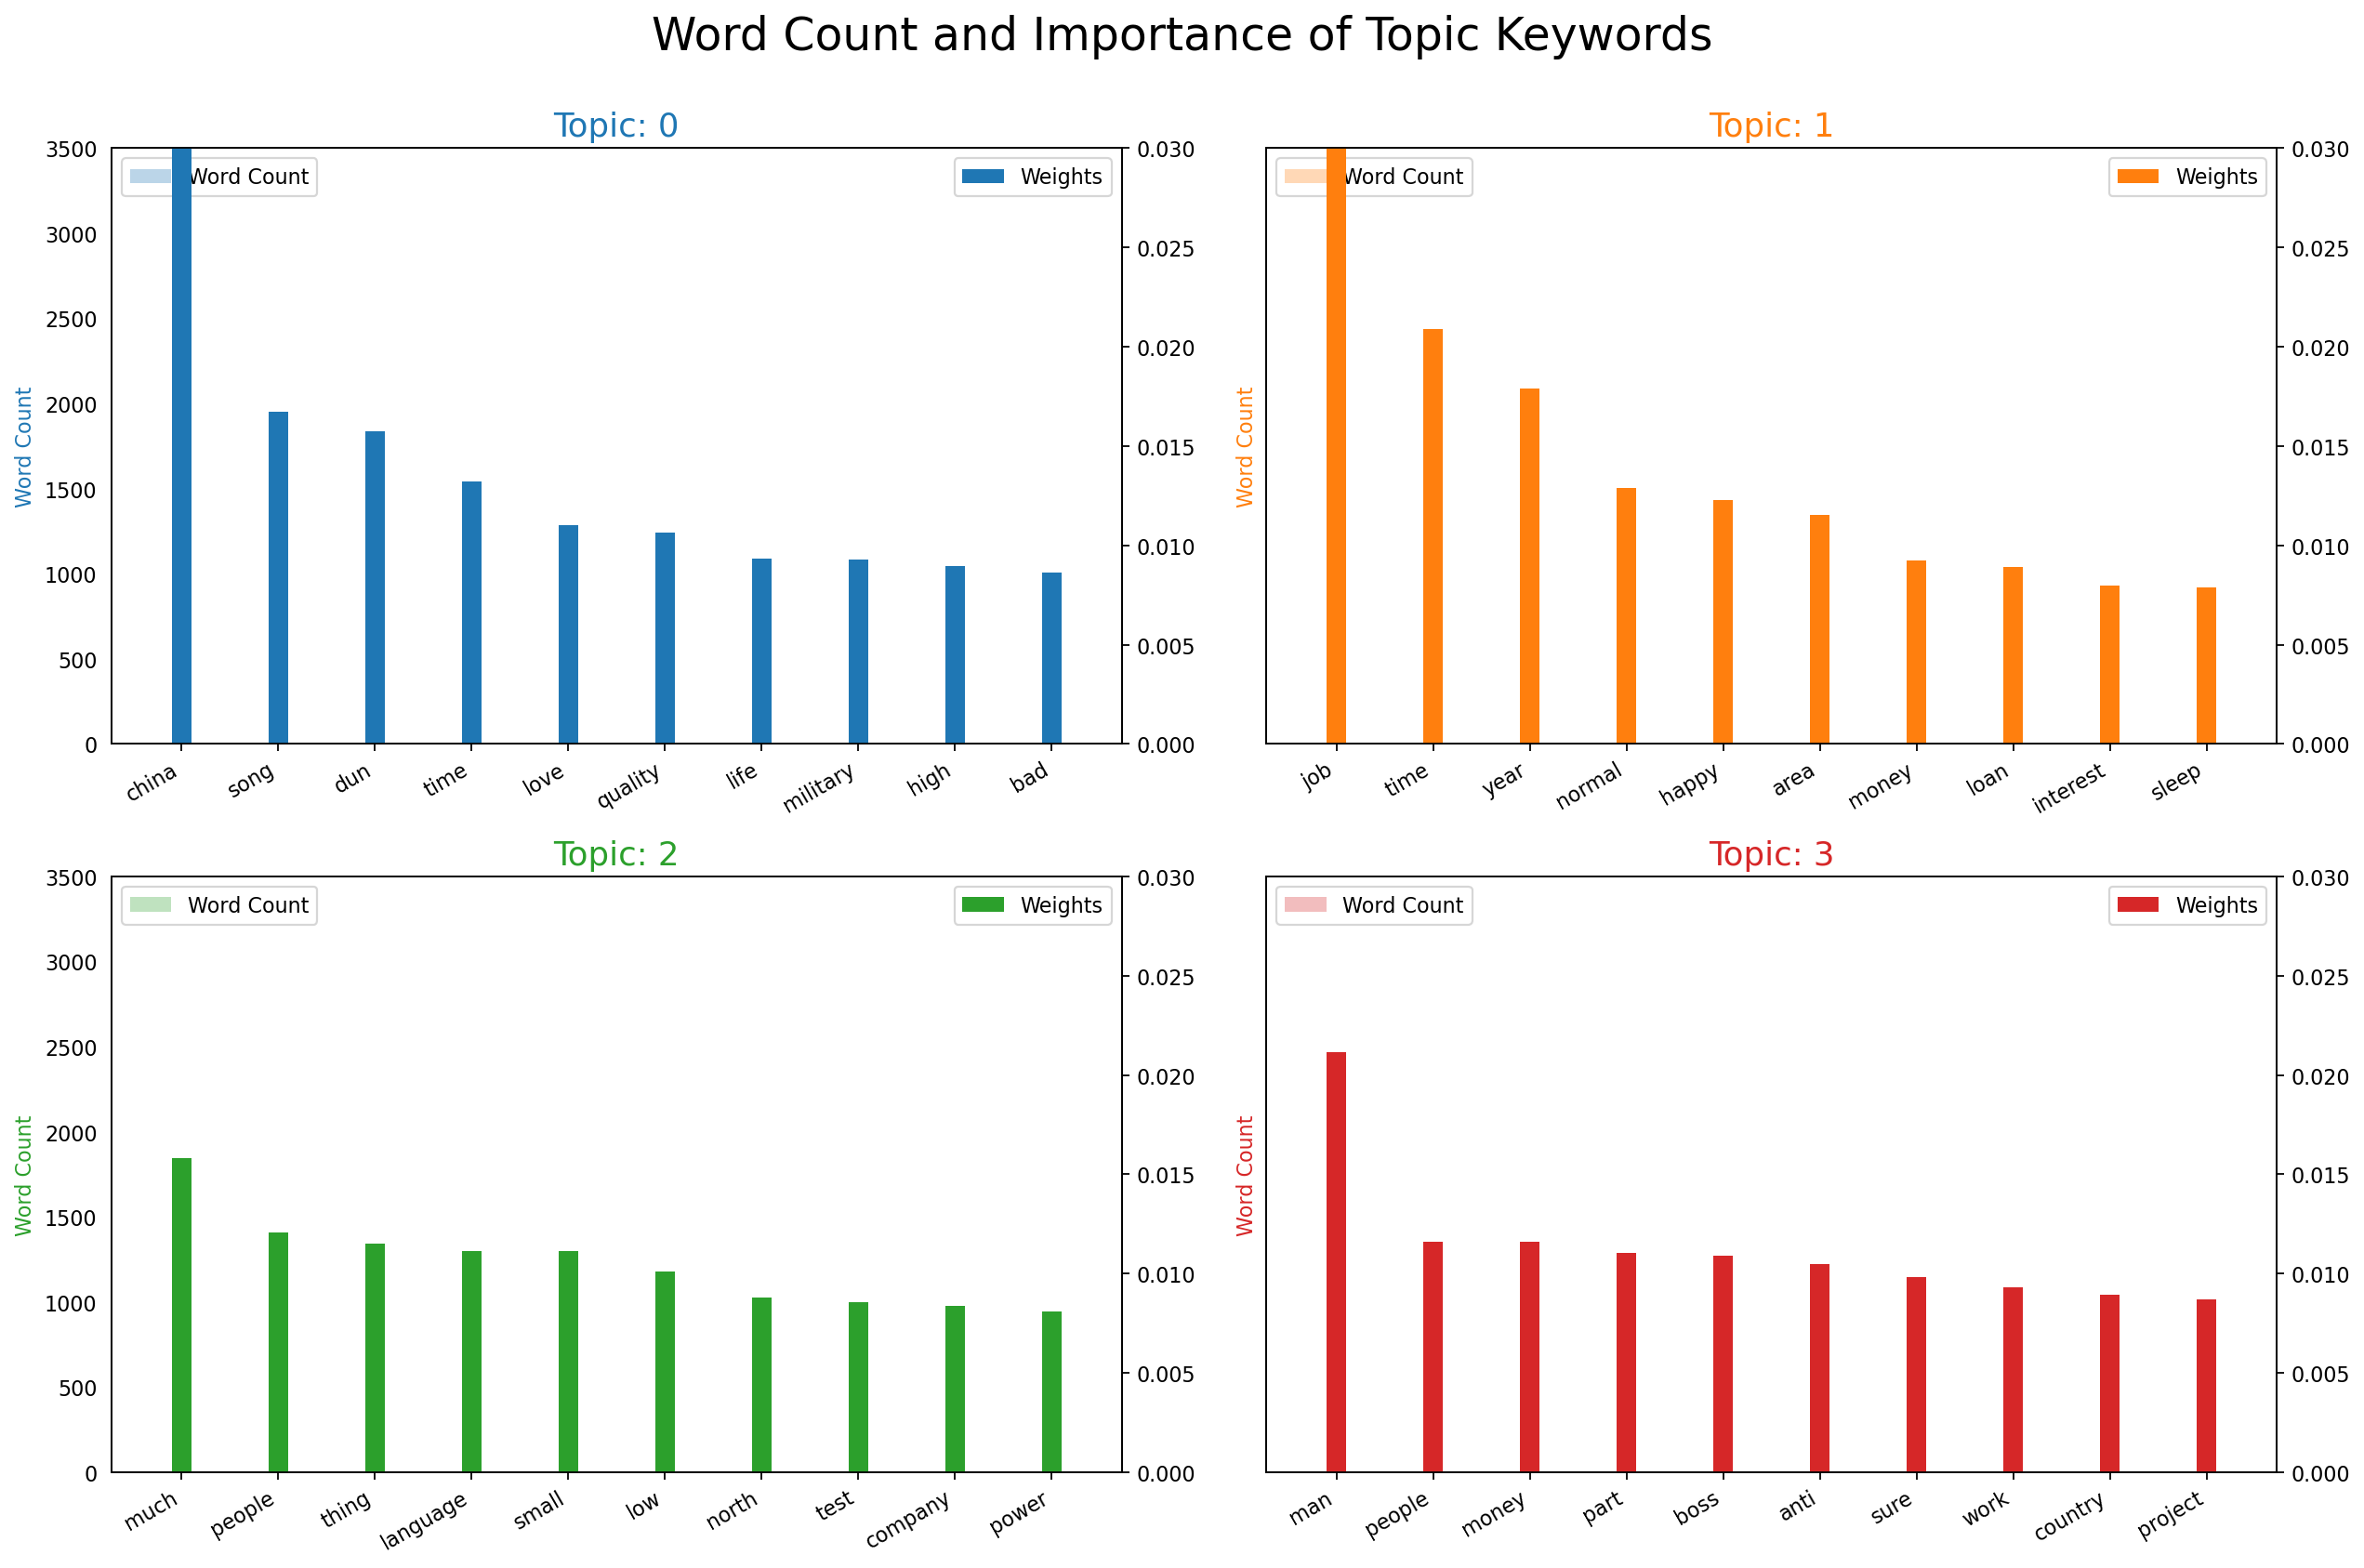

In [39]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [47]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
     
    topic_weights.append([w for w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\Shawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1121 samples in 0.004s...
[t-SNE] Computed neighbors for 1121 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1121
[t-SNE] Computed conditional probabilities for sample 1121 / 1121
[t-SNE] Mean sigma: 0.000046
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.533371
[t-SNE] KL divergence after 1000 iterations: 0.118990


Loading BokehJS ...